# PHYS20762 - Project 3 : Monte Carlo Techniques and Neutron Transport and Scattering Through a Shielding Layer  

Ronak Gorasia<br>
University of Manchester  
April 2025

We first initialise our Python interpreter and upload the constants given for this project

In [35]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import time
from matplotlib.animation import FuncAnimation

barn_conv = 1e-24 # converts barns to cm^-2
avogadro = 6.02*10**23 # Avogadro's constant


## 1D sample

Checking our uniform random table is uniform. To verify this the mean and variance of the random uniform table will be calculated and compared to the expected values. The mean of a uniform distribution is $\frac{(a+b)}{2}$, where $a$ is the lower limit and $b$ is the upper limit of the distribution. Likewise, the variance of this distribution is expected to be $\frac{(b-a)^2}{12}$. 

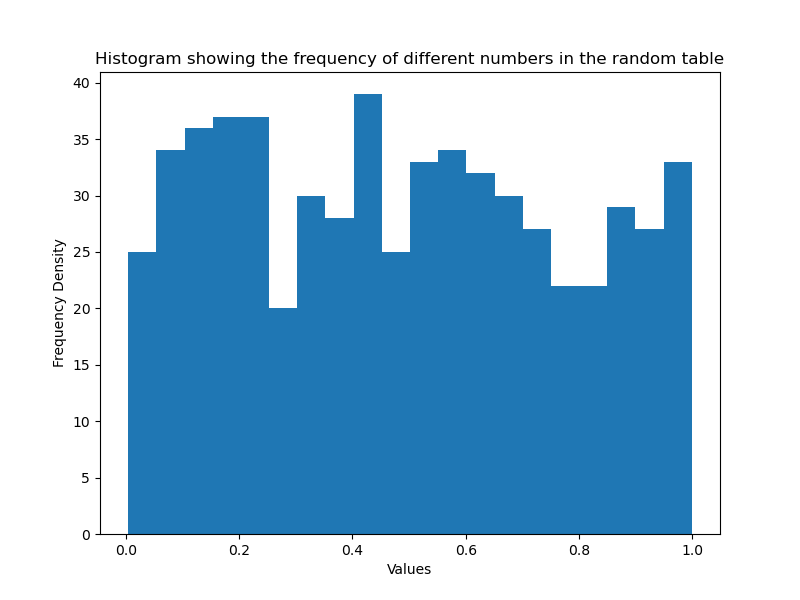

The expected mean is 0.5000 and the calculated mean is 0.4862
The expected variance is 0.0833 and the calculated variance is 0.0824


In [36]:
plt.close()
test_sample = np.random.uniform(0,1,size=600)
plt.figure(1,figsize = (8,6))
plt.hist(test_sample,bins=20) #plotting a histogram for the uniform distributino
plt.xlabel("Values")
plt.ylabel("Frequency Density")
plt.title("Histogram showing the frequency of different numbers in the random table")
plt.show()

def checker(sample,upper,lower):
    expected_mean = (upper+lower)/2
    expected_var = (upper-lower)**2/12
    calculated_mean = np.mean(sample)
    calculated_var = np.var(sample)
    print("The expected mean is {0:.4f} and the calculated mean is {1:.4f}".format(expected_mean,calculated_mean))
    print("The expected variance is {0:.4f} and the calculated variance is {1:.4f}".format(expected_var,calculated_var)) #verifying the results

checker(test_sample,1,0)

As the calculated mean and variance is within 5% of the true value of the expected mean and variance when the test is conducted 5 times, the random table has been verified as a uniform distribution.

## 3D sample

To explore the uniform random table in 3D, a table will be generated and displayed in an interactive 3D scatter plot. The scatter plot can be rotated so that we can verify that the points do not align on any hyperplanes which would invalidate the randomness of the data.  

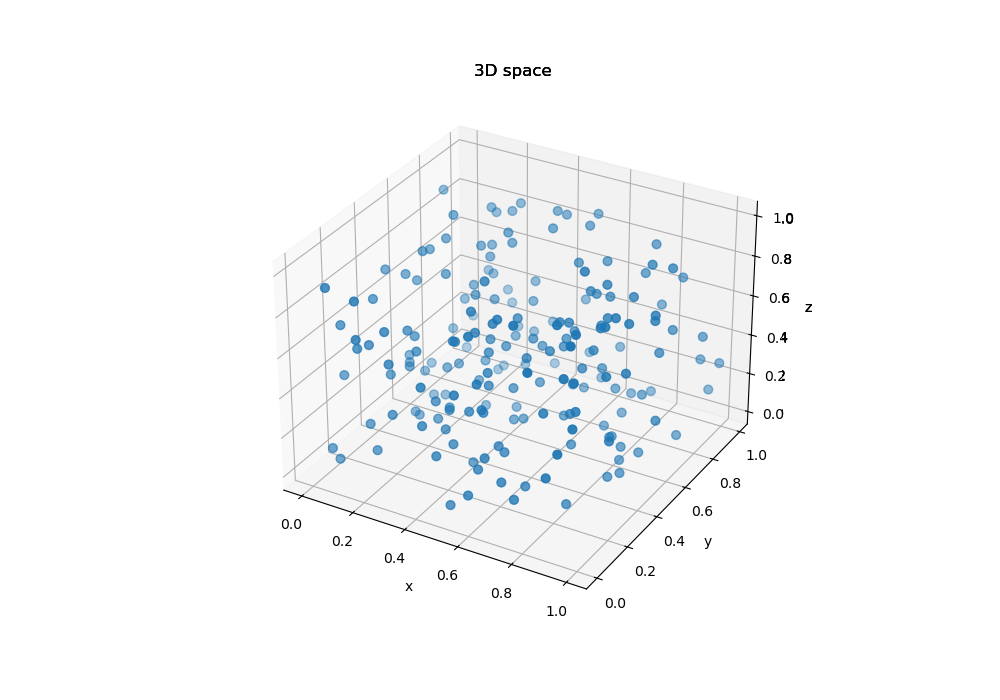

In [37]:
plt.close()
sample = np.random.uniform(0,1,(200,3))
x = np.array(sample[:,0])
y = np.array(sample[:,1])
z = np.array(sample[:,2])
fig = plt.figure(2,figsize = (10,7)) 
ax2 = fig.add_subplot(projection = "3d")
ax2.scatter(x,y,z,s=40) # plotting 200 random points in 3d 


ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_title("3D space")
plt.show()

The following code shows the spectral problem occuring for the RANDSSP program where hyperplanes have formed.

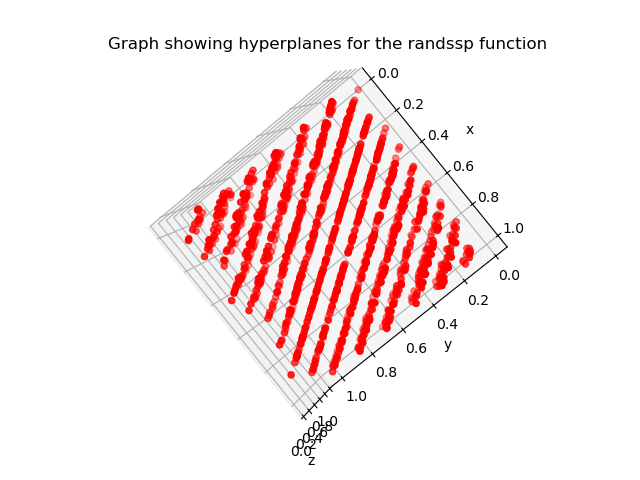

In [38]:
# RANDSSP Multiplicative congruential uniform random number generator
def randssp(p, q):
    global m, a, c, x
    m = 2**31
    a = 2**16 + 3
    c = 0
    x = 123456789
    try: x
    except NameError:
        m = 2**31
        a = 2**16 + 3
        c = 0
        x = 123456789

    r = np.zeros((p, q))

    for l in range(q):
        for k in range(p):
            x = (a * x + c) % m
            r[k, l] = x / m
    
    return r

# Generate random numbers
k = randssp(3, 1500)

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k[0, :], k[1, :], k[2, :], color='r')
ax.view_init(elev=-79, azim=-83, roll=-58)
ax.set_title("Graph showing hyperplanes for the randssp function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


## Exponential Random Number Generator

In order to simulate the neutrons, we require random samples to be generated according to an exponential function. The model follows the following equation :

<center>$exp(-x/\lambda)$.</center>

In order to sample this exponential this function, we need to find the inverse continuous distribution function. In our case the inverse CDF takes the form:

<center>$-\lambda ln(x)$.</center>

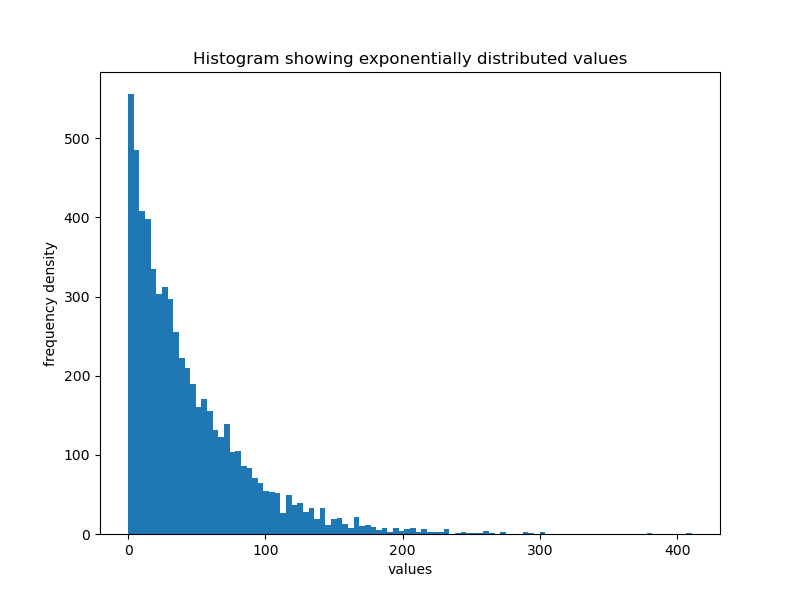

In [53]:
plt.close()
regular_sample = np.random.uniform(0,1,size=6000)

def expon(x,atten):
    return -atten*np.log(x)


plt.figure(3, figsize = (8,6))

#calculating mean free path for water
n = 1*(avogadro)/18.0153
mfp = 1/(n*0.6652*barn_conv)

# plotting a histogram of the exponentially distributed values
erng = expon(regular_sample,mfp)
plt.hist(erng,bins=100)
plt.xlabel("values")
plt.ylabel("frequency density")
plt.title("Histogram showing exponentially distributed values")
plt.show()


In this project, the attenuation length of neutrons needs to be found for the different samples. This will involve running the simulation multiple times and finding the gradient of each generated curve. As the simulations are random, the results are pooled together, the mean of the gradients will be found, and the standard deviation will be used to calculate the uncertainty.  

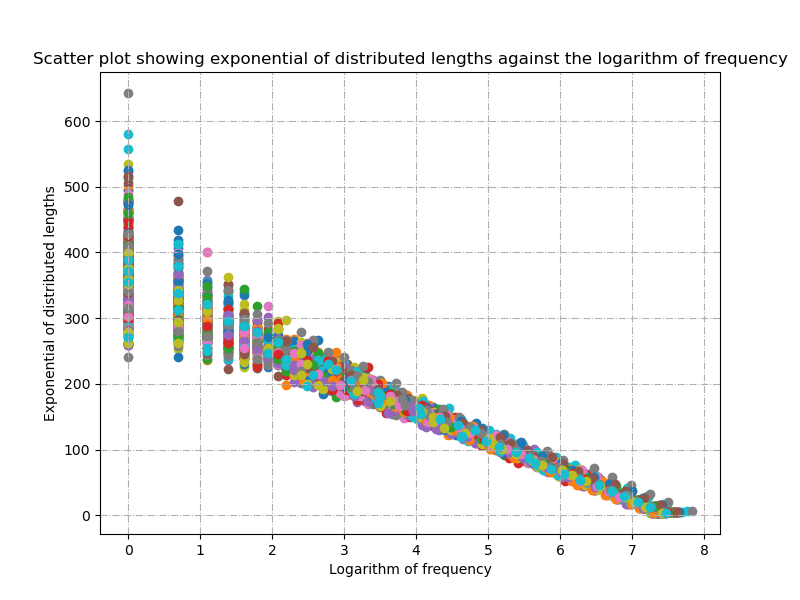

The attenuation length in water is 47.532 ± 0.211 cm


In [56]:
plt.close()
def attenuation_calc(N,number):
    ''' 
    This function generates the exponential distribution many times with the random uniform function. The multiple distributions are averaged to find the attenuation length and its uncertainty
    '''
    attenuation_lengths = np.array([])
    plt.figure(4,figsize =(8,6))
    plt.grid(True,linestyle='-.')
    for i in range(N):
        sample = np.random.uniform(0,1,size=number)
        exp_sample = expon(sample,mfp)

        freqs = np.array([])
        x_new = np.array([])
        n,bins = np.histogram(exp_sample,bins=50)
        for i in range(len(n)):
            if n[i] != 0:
                freqs = np.append(freqs,n[i])           #appends the frequency if not 0 to freqs
                midpoint = (bins[i]+bins[i+1])/2        #calculates the midpoint of 2 adjacent bins for the previous condition
                x_new = np.append(x_new,midpoint)       #appends the previous value to x_new

        log_fit = np.polyfit(np.log(freqs),x_new,1)
        plt.scatter(np.log(freqs),x_new)
        plt.title("Scatter plot showing exponential of distributed lengths against the logarithm of frequency")
        plt.xlabel("Logarithm of frequency")
        plt.ylabel("Exponential of distributed lengths")
        
        attenuation_lengths = np.append(attenuation_lengths, -log_fit[0])
    plt.show()
    mean = np.mean(attenuation_lengths)
    error = np.std(attenuation_lengths)/np.sqrt(N)
    print("The attenuation length in water is {0:.3f} ± {1:.3f} cm".format(mean,error))
attenuation_calc(100,10000)

## Generating Isotropic Points on a Sphere
Isotropic points on a sphere need to be uniformly distributed. To achieve this, we convert our Cartesian coordinates from our 3D sample into spherical polar coordinates. However, as the sampling of cosine is not linear, we use a uniform random distribution from -1 to 1 and take the inverse cosine to generate uniform random values for $\theta$. Using this procedure avoids poles being generated. The values of $\phi$ are taken from a uniform random sample between 0 and $2 \pi$ and $r$ is set to 1. 

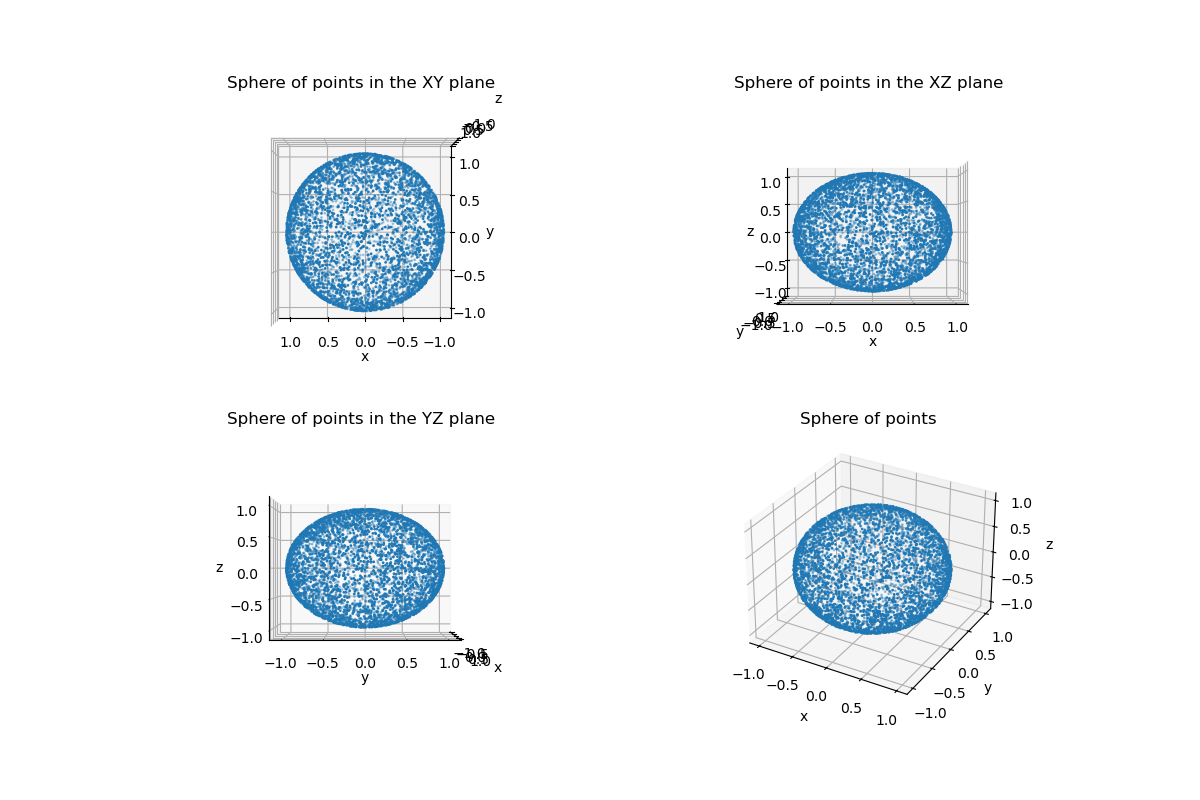

In [54]:
plt.close()
def isotropic_vectors(n):
    '''
    This function plots isotropic vectors in a uniform sphere
    '''
    vector_array = np.array([])
    for i in range(n):
        phi = np.random.uniform(0,2*np.pi)
        cos_theta = np.random.uniform(-1,1)
        theta = np.arccos(cos_theta) # converting theta so that it is uniformally distributed
        vector = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
        vector_array = np.append(vector_array,vector)
        
    x = vector_array[0::3]
    y = vector_array[1::3]
    z = vector_array[2::3]
    fig = plt.figure(figsize = (12,8))
    ax3 = fig.add_subplot(2,2,1, projection = "3d")
    ax3.scatter(x,y,z,s=1)
    ax3.view_init(elev=-90, azim=90, roll=0)
    ax3.set_xlabel("x")
    ax3.set_ylabel("y")
    ax3.set_zlabel("z")
    ax3.set_title("Sphere of points in the XY plane")
    ax4 = fig.add_subplot(2,2,2, projection = "3d")
    ax4.scatter(x,y,z,s=1)
    ax4.view_init(elev=0, azim=-90, roll=0)
    ax4.set_xlabel("x")
    ax4.set_ylabel("y")
    ax4.set_zlabel("z")
    ax4.set_title("Sphere of points in the XZ plane")
    ax5 = fig.add_subplot(2,2,3, projection = "3d")
    ax5.scatter(x,y,z,s=1)
    ax5.view_init(elev=0, azim=0, roll=0)
    ax5.set_xlabel("x")
    ax5.set_ylabel("y")
    ax5.set_zlabel("z")
    ax5.set_title("Sphere of points in the YZ plane")
    ax6 = fig.add_subplot(2,2,4, projection = "3d")
    ax6.scatter(x,y,z,s=1)
    ax6.set_xlabel("x")
    ax6.set_ylabel("y")
    ax6.set_zlabel("z")
    ax6.set_title("Sphere of points")

isotropic_vectors(5000)

Using the 4 different views of the isotropic points, we can visually verify that the points do not lie on any hyperplanes.

## Exponential Isotropic points in a spherical distribution
Generating these points is similar to generating the spherical isotropic vectors but uses the inverse exponential function that was previously defined to determine $r$ instead. 

Text(0.5, 0.92, 'A sphere of points that are exponentially distributed')

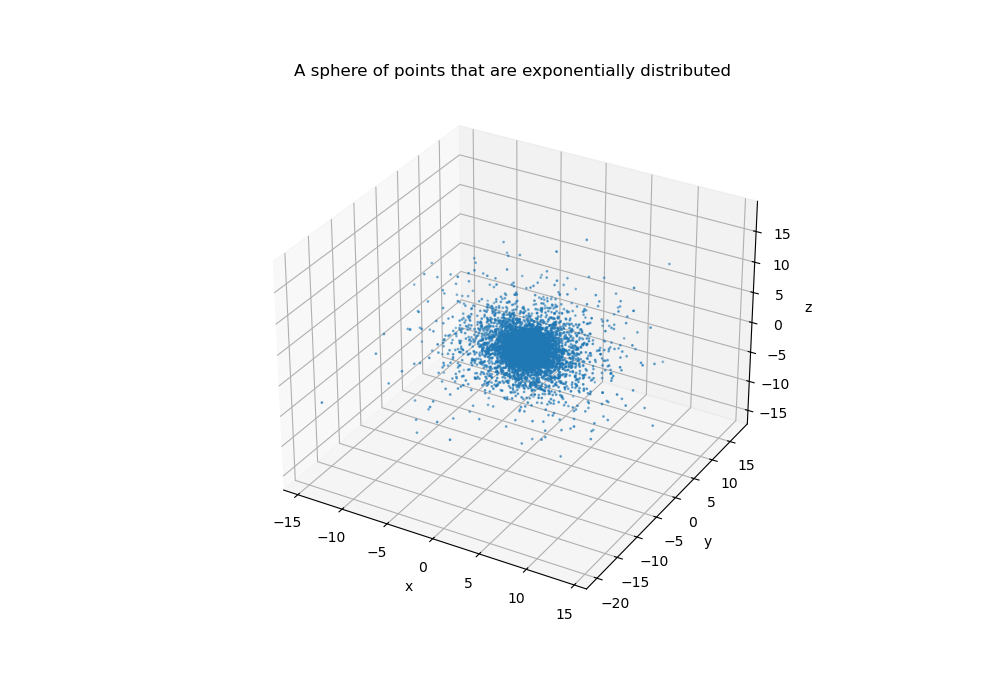

In [55]:
plt.close()
def expo_sphere(n, atten):
    '''
    This function generates the 3d isotropic vectors but the radius is randomly attenuated
    '''
    r = expon(np.random.uniform(0,1,n), atten)
    phi = np.random.uniform(0, 2 * np.pi, n)
    cos_theta = np.random.uniform(-1, 1, n)
    sin_theta = np.sqrt(1 - cos_theta ** 2)

    x = r * sin_theta * np.cos(phi)
    y = r * sin_theta * np.sin(phi)
    z = r * cos_theta
    return np.column_stack((x, y, z)).flatten()
    
mfp = 1/(n*0.6652*barn_conv)
data = expo_sphere(10000,2.5)

x = data[0::3]
y = data[1::3]
z = data[2::3]
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z,s=1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("A sphere of points that are exponentially distributed")


## Calculating probabilities for the simulation
The following code finds the mean free path and probability of absorption for water, lead and graphite. To begin, the macroscopic cross sections of absorption and scattering need to be found using the following equations:

<center>$\Sigma_A = \frac{\rho N_A \sigma_A}{M}$</center> <br>

<center>$\Sigma_S = \frac{\rho N_A \sigma_S}{M}$</center>


,where $\rho$ is the density of the material, $N_A$ is Avogadro's constant, $\sigma_A$ is the microscopic cross section for absorption, $\sigma_S$ is the microscopic cross section for scattering and $M$ is the molar mass of the molecule of the material. From the macroscopic cross sections, the total macroscopic section can be found which leads to the mean free path and the probability of absorption as shown in the following equations:

<center>$\Sigma_T = \Sigma_S + \Sigma_A$</center><br>

<center>$\lambda = \frac{1}{\Sigma_T}$</center><br>

<center>$p_A = \frac{\Sigma_A}{\Sigma_T}$ </center>

In [58]:
materials = np.array(["water","lead","graphite"])
barn_a = np.array([0.6652,0.158,0.0045])
barn_s = np.array([103,11.221,4.74])
density = np.array([1,11.35,1.67])
molar_mass = np.array([18.0153,207.2,12.011])

sigma_a_array = np.array([])
sigma_s_array = np.array([])
sigma_total = np.array([])
a_prob = np.array([])



for i in range(len(materials)):
    sigma_a = barn_conv * barn_a[i] * avogadro * density[i] / molar_mass
    sigma_s = barn_conv * barn_s[i] * avogadro * density[i] / molar_mass
    sigma_a_array = np.append(sigma_a_array, sigma_a[i])
    sigma_s_array = np.append(sigma_s_array, sigma_s[i])
    sigma_total = np.append(sigma_total, sigma_a[i]+sigma_s[i])
    a_prob = np.append(a_prob, (sigma_a[i])/(sigma_a[i]+sigma_s[i]))
    

mfp = np.array(1/sigma_total)

## Visualising Neutrons

To plot the neutrons' path, each neutron starts at $x=0$ and takes a step into the slab. For each step the neutron generates a random number from 0 to 1, if this number is less than the absorption probability it gets absorbed. If it isn't absorbed it is scattered by using the expo_sphere function until the neutron is reflected or transmitted across the slab. For each step the 3D coordinates are recorded so that the path can be displayed. 

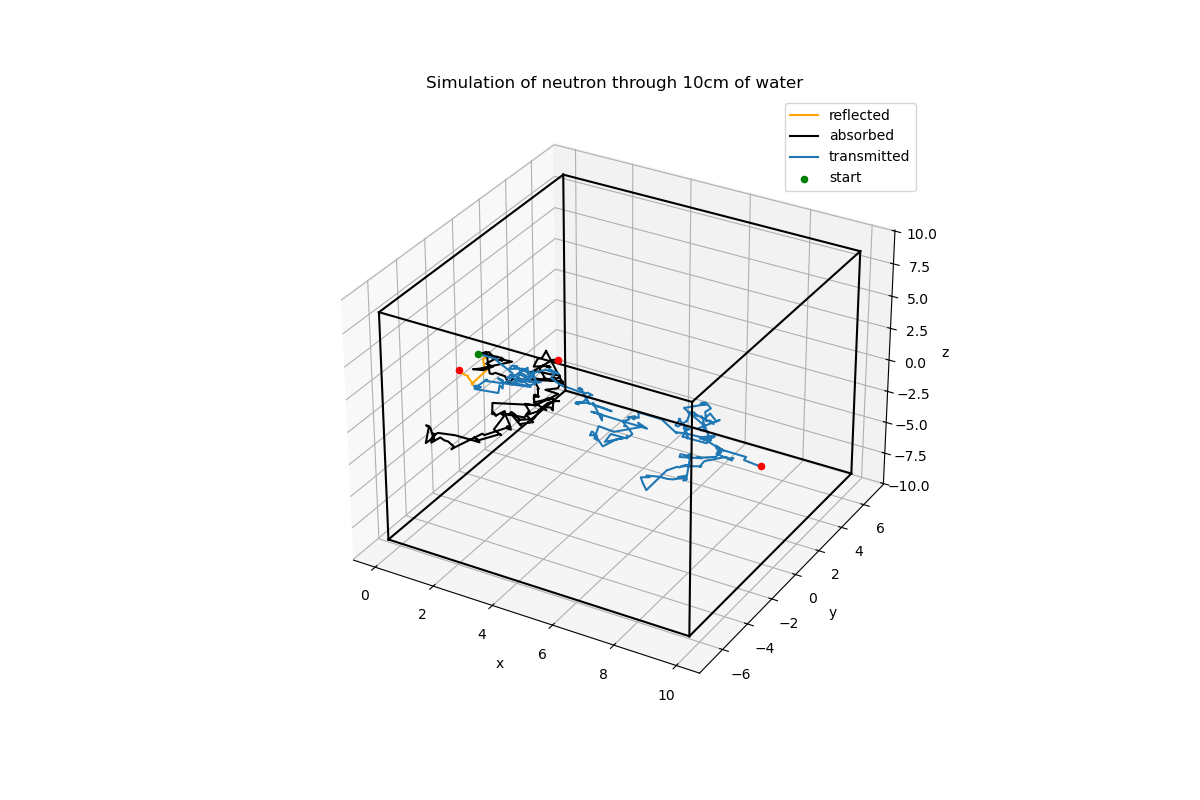

In [ ]:
plt.close()

sample_size = 500
width = 10

def expo_sphere(n, atten):
    '''
    This function returns exponential isotropic vectors in 3d'''
    r = expon(np.random.rand(n), atten)
    phi = np.random.uniform(0, 2 * np.pi, n)
    cos_theta = np.random.uniform(-1, 1, n)
    sin_theta = np.sqrt(1 - cos_theta ** 2) #calculates sin_theta using sin^2(x) + cos^2(x) = 1, this optimises the function by using regular arithmetic over numpy functions

    x = r * sin_theta * np.cos(phi)
    y = r * sin_theta * np.sin(phi)
    z = r * cos_theta
    return np.column_stack((x, y, z)).flatten() # returns a 1d array for x,y and z

def neutron_gun(n , material,L ,graph_query):
    '''
    This function generates visual representations for the different paths the neutrons can take in the different materials
    '''
    mat_dict = {"water": 0, "lead": 1, "graphite": 2}
    number = mat_dict[material]
    
    free_path = mfp[number]
    p_abs = a_prob[number]
    
    k_abs = False
    k_trans = False
    k_refl = False
    absorbed = 0
    transmitted = 0
    reflected = 0
    
    if graph_query == True:
        fig = plt.figure(figsize = (12,8)) #setting up the axes
        ax = fig.add_subplot(111,projection = "3d")
        ax.set_title("Simulation of neutron through {0}cm of {1}".format(L,material))
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
    while n>0:
        (x_vals,y_vals,z_vals) = (np.array([0]),np.array([0]),np.array([0]))
        (x,y,z) = (0,0,0)

        abs_check = False
        refl_check = False
        trans_check = False
        i = 0 # step counter
        
        while abs_check == False and refl_check == False and trans_check == False:
            if i == 0:
                x_hold = (expon(np.random.uniform(0,1),free_path))
                (x,y,z) = (x_hold,0,0)
                (x_vals,y_vals,z_vals) = (np.append(x_vals,x),np.append(y_vals,y),np.append(z_vals,z)) #neutron taking one step into slab
                i = i + 1
            else :
                (x,y,z) = expo_sphere(1,free_path)
                (x_vals,y_vals,z_vals) = (np.append(x_vals, x_vals[i] + x),np.append(y_vals,y_vals[i] + y),np.append(z_vals,z_vals[i] + z))
                i = i + 1 

            if x_vals[i] < 0: # iterating MC until neutron is absorbed, reflected or transmitted
                refl_check = True

            if x_vals[i] > L:
                trans_check = True

            if refl_check == False and trans_check == False:
                prob = np.random.uniform(0,1)
                if prob < p_abs:
                    abs_check = True

        if refl_check == True:
            reflected = reflected + 1 #counting the number of neutrons that are absorbed, reflected or transmitted
            result = "reflected"
        if abs_check == True:
            absorbed = absorbed + 1
            result = "absorbed"
        if trans_check == True:
            transmitted = transmitted + 1
            result = "transmitted"
        n = n - 1

        if result == "transmitted" and graph_query == True and k_trans == False: #plotting the neutron paths for transmitted, absorbed and reflected neutrons
            trans_y = np.max(np.abs(y_vals))
            trans_z = np.max(np.abs(z_vals))
            ax.plot(x_vals,y_vals,z_vals,label="transmitted")
            ax.scatter(x_vals[0],y_vals[0],z_vals[0],label="start",c='green',s=20)
            ax.scatter(x_vals[-1],y_vals[-1],z_vals[-1],c='red',s=20)
            ax.legend()
            trans_path = (x_vals,y_vals,z_vals)
            k_trans = True
            
        if result == "absorbed" and graph_query == True and k_abs == False:
            abs_y = np.max(np.abs(y_vals))
            abs_z = np.max(np.abs(z_vals))
            ax.plot(x_vals,y_vals,z_vals,label="absorbed",color="black")
            ax.scatter(x_vals[-1],y_vals[-1],z_vals[-1],c='red',s=20)
            ax.legend()
            abs_path = (x_vals,y_vals,z_vals)
            k_abs = True

        if result == "reflected" and graph_query == True and k_refl == False:
            refl_y = np.max(np.abs(y_vals))
            refl_z = np.max(np.abs(z_vals))
            ax.plot(x_vals,y_vals,z_vals,label="reflected",color="orange")
            ax.scatter(x_vals[-1],y_vals[-1],z_vals[-1],c='red',s=20)
            ax.legend()
            refl_path = (x_vals,y_vals,z_vals)
            k_refl = True
            
    if k_trans == True and k_abs == True and k_refl == True and graph_query == True: # plotting a box to show the slab
        
        max_y = np.max(np.abs([trans_y, abs_y, refl_y]))
        max_z = np.max(np.abs([trans_z, abs_z, refl_z]))
        origin = np.array([0, -1.5*(max_y),-1.5*(max_z)])  # Bottom-left-front corner
        size = np.array([L, 3*(max_y), 3*(max_z)])  # Width, Depth, Height
        x, y, z = origin
        dx, dy, dz = size
        # Define the 8 vertices of the cuboid
        vertices = np.array([
            [x, y, z], [x+dx, y, z], [x+dx, y+dy, z], [x, y+dy, z],  # Bottom four corners
            [x, y, z+dz], [x+dx, y, z+dz], [x+dx, y+dy, z+dz], [x, y+dy, z+dz]  # Top four corners
        ])
        # Define the 12 edges connecting the vertices
        edges = [
            [vertices[j] for j in [0, 1]], [vertices[j] for j in [1, 2]], 
            [vertices[j] for j in [2, 3]], [vertices[j] for j in [3, 0]],  # Bottom face
            
            [vertices[j] for j in [4, 5]], [vertices[j] for j in [5, 6]], 
            [vertices[j] for j in [6, 7]], [vertices[j] for j in [7, 4]],  # Top face
            
            [vertices[j] for j in [0, 4]], [vertices[j] for j in [1, 5]], 
            [vertices[j] for j in [2, 6]], [vertices[j] for j in [3, 7]]   # Side edges
        ]
        for edge in edges:
            ax.plot(*zip(*edge), color="black")  # Unzips X, Y, Z coordinates
         
        plt.show()
    
water_results = neutron_gun(sample_size ,"water" ,width ,True)
lead_results = neutron_gun(sample_size ,"lead" ,width,True)
graphite_results = neutron_gun(sample_size,"graphite" ,width ,True)         


## Optimised Neutron Simulator
This piece of code performs the Monte Carlo simulation without generating a visual representation in the quickest time possible by returning the number of transmitted, absorbed or reflected neutrons only. The code has been optimised by reducing the number of variables, reducing the number of if statement and append statements as well as using masks on arrays to quickly apply conditions. 

In [45]:
plt.close()

def expo_x(n, atten):
    '''
    function that generates x steps using spherical polar coords
    '''
    r = -atten * np.log(np.random.uniform(0,1)) #using the inverse exponential function
    phi = np.random.uniform(0, 2 * np.pi, n) 
    cos_theta = np.random.uniform(-1, 1, n)
    sin_theta = np.sqrt(1 - cos_theta ** 2) # found by using a trig identity : sin^2(x) + cos^2(x) = 1
    x = r * sin_theta * np.cos(phi)
    return x
    
def neutron_sim(n, L, material):
    '''
    generates the number of neutrons that are reflected, transmitted or absorbed for different materials and lengths
    '''
    max_steps = 500
    mat_dict = {"water": 0, "lead": 1, "graphite": 2}
    number = mat_dict[material]
    
    x = expon(np.random.uniform(0,1,n), mfp[number]) # takes one step into the slab
    status = np.full(n, -1)  # -1: alive, 0: reflected, 1: absorbed, 2: transmitted
    alive = np.ones(n, dtype=bool) # truth array
    
    for i in range(max_steps):
        if not np.any(alive):
            break

        alive_x = np.where(alive)[0] #creating an array where neutrons are alive
        
        x_step = expo_x(np.count_nonzero(alive),mfp[number]) # taking one step in the x direction for all active neutrons
        x[alive_x] = x[alive_x] + x_step
    
        #condition masks
        test = x[alive_x]
        reflected = test < 0
        transmitted = test > L
        absorbed_mask = (test >= 0) & (test <= L) & (np.random.uniform(0,1,len(alive_x)) < a_prob[number])
    
        status[alive_x[reflected]] = 0 # applying the conditions of the masks to the status indices
        status[alive_x[transmitted]] = 2
        status[alive_x[absorbed_mask]] = 1

        dead = reflected | transmitted | absorbed_mask
        alive[alive_x[dead]] = False # deactivating neutrons that have terminated
    
    reflected = np.count_nonzero(status == 0) # counting up the no. of reflected/absorbed/transmitted neutrons
    absorbed = np.count_nonzero(status == 1)
    transmitted = np.count_nonzero(status == 2)
    
    return reflected, absorbed, transmitted
start = time.time()
print(neutron_sim(10000,10,"water"))
print("The time taken is {} seconds to run one simulation".format(time.time()-start))

(8146, 1795, 32)
The time taken is 0.05300164222717285 seconds to run one simulation


## Quantifying Scattering Process
The neutron simulation is repeated so that the number of transmitted, absorbed, and reflected neutrons can be averaged over the runs and we can find the standard deviation so that errors can be calculated. These values are converted into percentages of the sample size. The errors we use is the standard error on the mean by using the following equation :

<center>$\delta X = \frac{\sigma_{X}}{\sqrt{N}}$</center>

,where $\sigma_X$ is the standard deviation of the sample and $\sqrt{N}$ is the number of runs square rooted.

In [46]:
sample_size = 10000
run_number = 10

In [47]:
def quantifier(sample_size,L,material,output_query):
    '''
    iterates the neutron_sim to generate mean values and errors for transmission, absorption and reflection rates
    '''
    results = np.zeros(3*run_number) # generating an array to store values from the simulation
    for i in range(run_number):
        value = neutron_sim(sample_size,L,material) #calling neutron_sim
        results[3*i] = value[0] #assigning rates in order
        results[3*i + 1] = value[1]
        results[3*i + 2] = value[2]
    refl_mean = 100*np.mean(results[0::3])/sample_size
    refl_err = 100*np.std(results[0::3])/(sample_size)**(3/2)
    abs_mean = 100*np.mean(results[1::3])/sample_size
    abs_err = 100*np.std(results[1::3])/(sample_size)**(3/2)
    trans_mean = 100*np.mean(results[2::3])/sample_size
    trans_err = 100*np.std(results[2::3])/(sample_size)**(3/2)
    if output_query == True:
        print("-------- ",material,"results --------")
        print("The transmission rate is {0:.3f} ± {1:.3f}%".format(trans_mean,trans_err))
        print("The absorption rate of is {0:.3f} ± {1:.3f}%".format(abs_mean,abs_err))
        print("The reflection rate of is {0:.3f} ± {1:.3f}%".format(refl_mean,refl_err))
        print("")
    data = [refl_mean,refl_err,abs_mean,abs_err,trans_mean,trans_err]
    return data

water_data = quantifier(sample_size,run_number,"water",False)
lead_data = quantifier(sample_size,run_number,"lead",False)
graphite_data = quantifier(sample_size,run_number,"graphite",False)



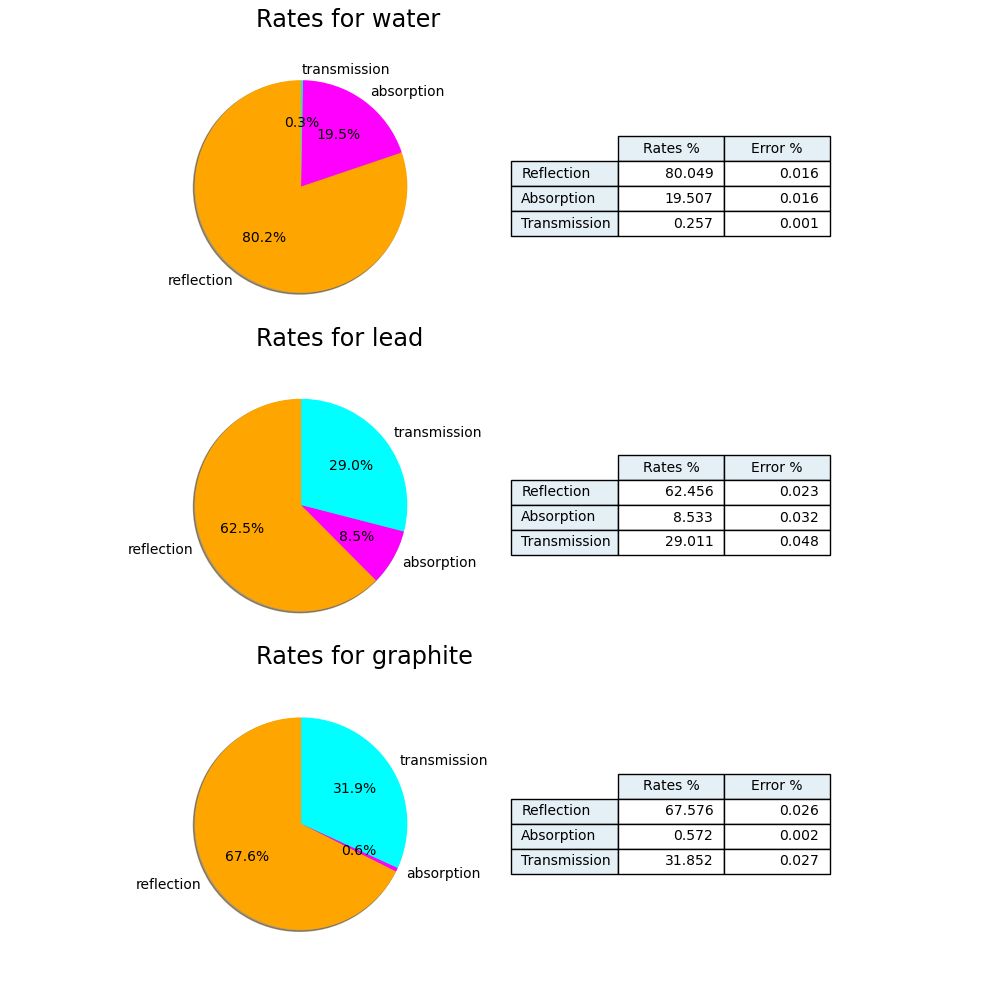

In [48]:
plt.close()

sample_size = 10000
run_number = 10
xlabels = ["reflection","absorption","transmission"]
cols = ["orange","magenta","cyan"]

def pie_maker(input_data,title,count):    
    '''
    This function generates pie charts and table of the rates of different neutron events occutring for the different materials'''
    pie_data = input_data[0::2]
    plt.figure(69,figsize=(10,10))
    plt.subplot(5,2,count)
    plt.pie(pie_data, labels=xlabels, autopct='%1.1f%%', startangle=90,radius=2,colors = cols, shadow=True) # generating pie charts
    plt.text(-0.85,3,"Rates for {}".format(title),size='xx-large')
    plt.subplot(5,2,count+1)
    
    data = [[input_data[0],input_data[1]],
            [input_data[2], input_data[3]],
            [input_data[4], input_data[5]]]

    columns = ('Rates %','Error %')
    rows = ['Reflection','Absorption','Transmission']

    rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(columns), 0.1))
    
    cell_text = [["{0:.3f}".format(input_data[0]),"{0:.3f}".format(input_data[1])], #defines the values used in the table
            ["{0:.3f}".format(input_data[2]), "{0:.3f}".format(input_data[3])],
            ["{0:.3f}".format(input_data[4]), "{0:.3f}".format(input_data[5])]]
    
    the_table = plt.table(cellText=cell_text, # formatting the table and outputting
                          rowLabels=rows,
                          colLabels=columns,
                          rowColours=rcolors,
                          colColours = ccolors,
                          colWidths= [0.3,0.3,0.3],
                          loc='center')
    the_table.scale(1, 1.5)
    # Adjust layout to make room for the table:
    ax = plt.gca()
    ax.get_xaxis().set_visible(False) # removing axes and boxes for plots
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    
hold1 = pie_maker(water_data,"water",1)
hold2 = pie_maker(lead_data,"lead",5)
hold3 = pie_maker(graphite_data,"graphite",9)
plt.show()

## Attenuation Calculations
In order to determine the attenuation length across different materials, the quantifying process is repeated at different widths of the slab. For each point, the mean transmission, absorption, and reflection is recorded as well as their respective errors. This data is combined and plotted to show the variation of each quantity with the width of the slab. Using the transmission values, a natural log transformation is applied to the data so that it becomes linear. The data is fitted to a straight line and the gradient of the line is used to determine the attenuation length of the material using the following equation : 

<center> $L = \frac{-1}{gradient}$.</center>

As the straight line is fitted to these data points, a covariance matrix is also generated which determines the error on the gradient. This can be used to find the error of the attenuation length using the following equation : 

<center> $\delta L = \frac{err_{grad}}{grad^2}$</center>

----------RESULTS-----------
The attenuation length for water is 1.741 ± 0.031 cm
The reduced Χ² for the fit against the data for water is 19.700

The attenuation length for lead is 8.870 ± 0.157 cm
The reduced Χ² for the fit against the data for lead is 2.070

The attenuation length for graphite is 9.780 ± 0.261 cm
The reduced Χ² for the fit against the data for graphite is 6.989



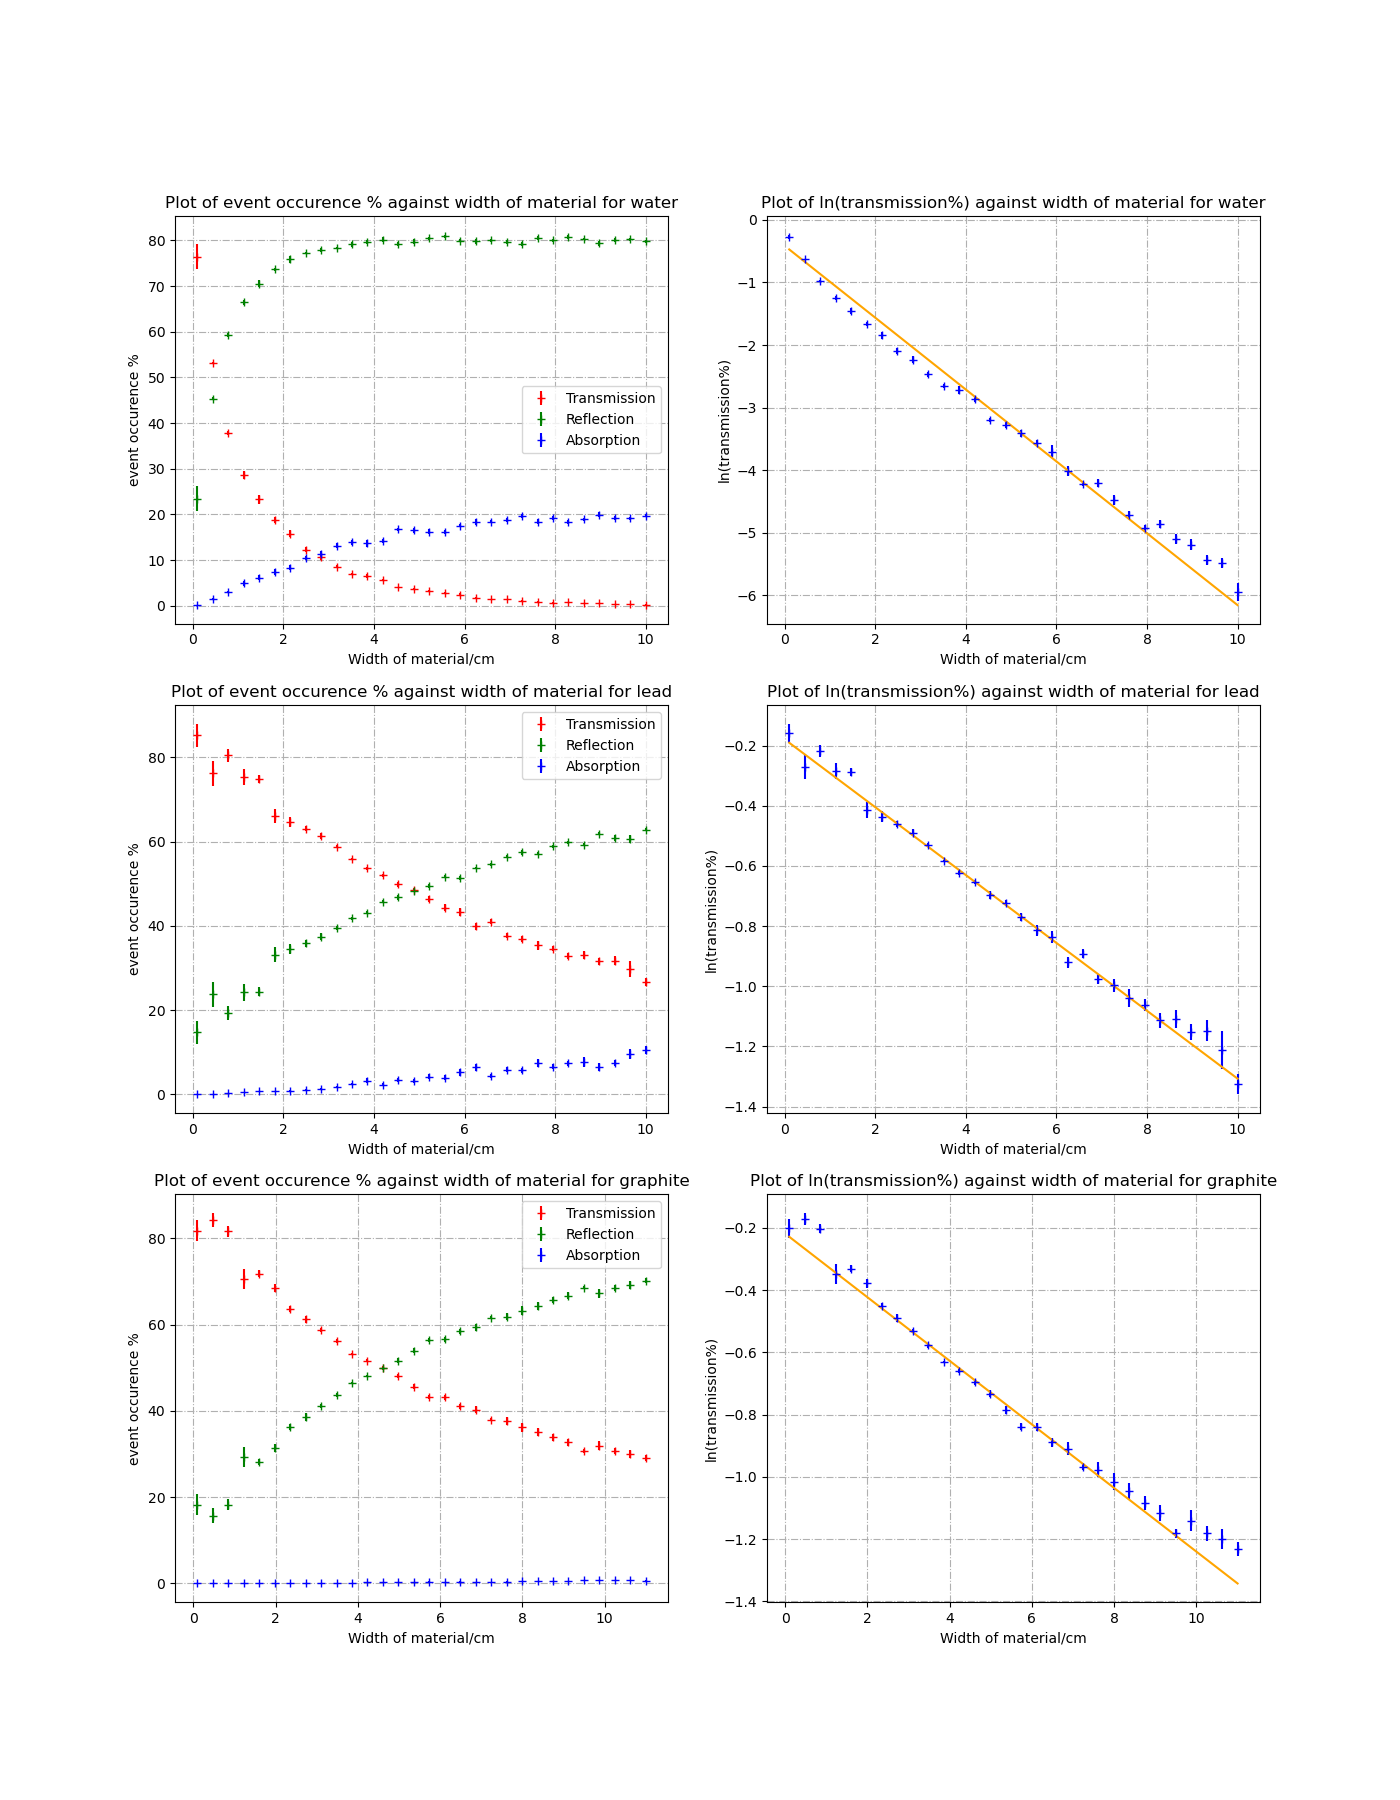

The time taken to determine the attenuation lengths of all 3 materials is 14.912 seconds


In [49]:
number_of_points = 30
water_lengths = np.linspace(0.1,10,number_of_points)
lead_lengths = np.linspace(0.1,10,number_of_points)
graphite_lengths = np.linspace(0.1,11,number_of_points)
sample_size = 10000
run_number = 10

plt.close()
plt.figure(figsize=(14,18))

def atten_calc(length_list,sample_size,material,run_number):
    '''
    This function iterates the quantifying process over different lengths for the different materials and determines the attenuation length in each material.
    '''
    
    mat_dict = {"water": 0, "lead": 1, "graphite": 2}
    number = mat_dict[material]

    labels = ["water","lead","graphite"]
    
    refl_means, abs_means, trans_means = np.zeros(len(length_list)), np.zeros(len(length_list)), np.zeros(len(length_list))
    refl_errs, abs_errs, trans_errs = np.zeros(len(length_list)), np.zeros(len(length_list)), np.zeros(len(length_list))
    
    for j in range(len(length_list)):# this loop simulates the MC method 10 times for each length and records the result/errors
        trans_results = np.zeros(run_number)
        abs_results = np.zeros(run_number)
        refl_results = np.zeros(run_number)
        for i in range(run_number):
            refl_val, abs_val, trans_val = neutron_sim(sample_size,length_list[j],material)
            refl_results[i], abs_results[i], trans_results[i] = 100*refl_val/sample_size, 100*abs_val/sample_size, 100*trans_val/sample_size
        
        refl_means[j], abs_means[j], trans_means[j] = np.mean(refl_results), np.mean(abs_results), np.mean(trans_results)
        refl_errs[j], abs_errs[j], trans_errs[j] = np.std(refl_results,ddof = 1)/(run_number)**(1/2), np.std(abs_results,ddof = 1)/(run_number)**(1/2), np.std(trans_results,ddof = 1)/(run_number)**(1/2)
    
    plt.subplot(3,2,(2*number + 1))
    plt.grid(True, linestyle = '-.') # plotting the absorption, reflection and transmission rates across the slab
    plt.errorbar(length_list,trans_means,trans_errs,fmt = 'r+',label="Transmission")
    plt.errorbar(length_list,refl_means,refl_errs,fmt = 'g+',label="Reflection")
    plt.errorbar(length_list,abs_means,abs_errs,fmt = 'b+',label="Absorption")
    plt.xlabel("Width of material/cm")
    plt.ylabel("event occurence %")
    plt.title("Plot of event occurence % against width of material for {}".format(labels[number]))
    plt.legend()
    
    plt.subplot(3,2,(2*number + 2))
    plt.grid(True, linestyle = '-.')
    x = length_list
    y = np.log(trans_means/100)
    yerr = trans_errs/trans_means
    (coefs, cov) = np.polyfit(x,y,1,w=1/yerr,cov=True) # fitting the log transformed data to a 1d polynomial
    x_fit = np.linspace(np.min(length_list),np.max(length_list),1000)

 
    red_chi_sq = np.sum((((coefs[0]*length_list + coefs[1])-y)/yerr)**2)/(len(length_list)-2) #determining chi squared
    atten_length = -1/coefs[0]
    atten_length_err = np.sqrt(cov[0][0]) / coefs[0]**2 #determing the attenuation length and the uncertainty
    plt.errorbar(x,y,yerr,fmt = 'b+')
    plt.plot(x_fit, coefs[0]*x_fit + coefs[1], color = "orange", linestyle = "-") #plotting the 1d log transformed transmission rates
    plt.xlabel("Width of material/cm")
    plt.ylabel("ln(transmission%)")
    plt.title("Plot of ln(transmission%) against width of material for {}".format(labels[number]))
    print("The attenuation length for {0} is {1:.3f} ± {2:.3f} cm".format(labels[number],atten_length,atten_length_err))
    print(r"The reduced Χ² for the fit against the data for {0} is {1:.3f}".format(labels[number],red_chi_sq))
    print("")
start = time.time() 

print("----------RESULTS-----------")

atten_calc(water_lengths,sample_size,"water",run_number)
atten_calc(lead_lengths,sample_size,"lead",run_number)
atten_calc(graphite_lengths,sample_size,"graphite",run_number)
plt.show()
print("The time taken to determine the attenuation lengths of all 3 materials is {0:.3f} seconds".format(time.time() - start)) # used to benchmark how quick the code is

For repeated runs, the data fits a natural logarithmic model for the graphite and the lead as the reduced chi-squared value is of a reasonable order. However, the reduced chi-squared value for water is higher than usual and this suggests that a natural logarithmic model may not be suitable to model the transmission through water.

## Woodcock Method

Previously, for the Monte Carlo method, we have simulated neutrons through one slab of material. When more complicated geometries of multiple slabs are introduced, the Woodcock method is preferred. The Woodcock method uses virtual steps as if the multiple slabs are homogenous by using a maximum cross-section across all the regions. For each step, there is a probability that the interaction is virtual or real, which is determined using the following formula:

<center> $p_{real} = \frac{\Sigma_{slab}}{\Sigma_{max}}$


,where $\Sigma_{slab}$ is the local cross-section of where the neutron currently is and $\Sigma_{max}$ is the maximum cross-section across all slabs. If the random probability generated in the program exceeds $p_{real}$, the interaction is real and the simulation proceeds by determining whether the neutron has been absorbed, just like the Monte Carlo method. If the neutron is not absorbed, the direction vectors of the neutron are randomised, and it takes another step. If the interaction is virtual, the neutron will move to the next step and keep the same direction vectors as it did previously. 

In [50]:
sample_size = 10000
run_number = 10
variables = [10,10,"graphite","graphite"]

def woodcock_sim(n,L1,L2,material1,material2):
    mat_dict = {"water": 0, "lead": 1, "graphite": 2}
    number1 = mat_dict[material1]
    number2 = mat_dict[material2]

    L1 = float(L1)
    L2 = float(L2)

    
    L = L1 + L2
    
    sigma_max = np.max([sigma_total[number1], sigma_total[number2]])
    lengths = -np.log(np.random.uniform(0, 1, n)) * 1/sigma_max  #taking a step into the first slab
    
    status = np.full(n,-1)
    margin = 0.03
    alive = np.ones(n, dtype=bool)
    
    phi = np.random.uniform(np.pi/2-margin,np.pi/2+margin,n)
    theta = np.arccos(1-2*np.random.uniform(0,margin,n))
    
    x = np.full(n, 1e-4)
    
    while np.any(alive): 
            
        alive_x = np.where(alive)[0]

        step = -1/sigma_max * np.log(np.random.uniform(0,1,np.count_nonzero(alive)))
        x[alive_x] += step * np.cos(theta[alive_x]) * np.sin(phi[alive_x]) 
        
        test = x[alive_x]
        reflected = test < 0
        transmitted = test >= L
        
        status[alive_x[reflected]] = 0
        status[alive_x[transmitted]] = 2
        alive[alive_x[reflected | transmitted]] = False

        remaining = ~(reflected|transmitted)
        active_x = alive_x[remaining]
        x_remaining = x[active_x]
        
        in_slab1 = (x_remaining >= 0) & (x_remaining < L1)
        in_slab2 = (x_remaining >= L1) & (x_remaining < L)
        
        sigma_t = np.empty_like(x_remaining, dtype=float)
        sigma_t[in_slab1] = sigma_total[number1]
        sigma_t[in_slab2] = sigma_total[number2]
        
        prob_real = sigma_t/sigma_max 
        is_real = np.random.uniform(0,1,len(active_x)) < prob_real
        
        real_collisions = active_x[is_real]

        if len(real_collisions)>0:
            x_real = x[real_collisions]
            slab_real1 = x_real < L1
            slab_real2 = (x_real >= L1) & (x_real <= L)
            
            abs_prob = np.zeros_like(real_collisions, dtype=float)
            abs_prob[slab_real1] = a_prob[number1]
            abs_prob[slab_real2] = a_prob[number2]
            
            absorbed_real = np.random.uniform(0,1,size=len(real_collisions)) < abs_prob
            abs_mask = real_collisions[absorbed_real]
            status[abs_mask] = 1
            alive[abs_mask] = False
        
            scattered = real_collisions[~absorbed_real]
            theta[scattered] = np.arccos(1 - 2*np.random.uniform(0,1,len(scattered)))
            phi[scattered] = np.random.uniform(0, 2*np.pi, len(scattered))

    reflected = np.count_nonzero(status == 0)
    absorbed = np.count_nonzero(status == 1)
    transmitted = np.count_nonzero(status == 2)

    assert reflected + absorbed + transmitted == n, "Neutrons missing" #additional sanity check to ensure no neutrons are lost
    
    return reflected*100/n , absorbed*100/n , transmitted*100/n 



def averaging(run_number,variables):
    refl_results, abs_results, trans_results = np.zeros(run_number), np.zeros(run_number), np.zeros(run_number)
    for i in range(run_number):
        refl_, abs_, trans_ = woodcock_sim(sample_size,variables[0],variables[1],variables[2],variables[3])
        refl_results[i] = refl_
        abs_results[i] = abs_
        trans_results[i] = trans_
        refl_mean, refl_err = np.mean(refl_results), np.std(refl_results,ddof = 1)/(run_number)**(1/2)
        abs_mean, abs_err = np.mean(abs_results), np.std(abs_results,ddof = 1)/(run_number)**(1/2)
        trans_mean, trans_err = np.mean(trans_results), np.std(trans_results,ddof = 1)/(run_number)**(1/2)
    print("")
    print("----- WOODCOCK RESULTS -----")
    print("Transmission rate: {0:.3f} ± {1:.3f} %".format(trans_mean,trans_err))
    print("Absorbption rate: {0:.3f} ± {1:.3f} %".format(abs_mean,abs_err))
    print("Reflection rate : {0:.3f} ± {1:.3f} %".format(refl_mean,refl_err))
    
    return [refl_mean,refl_err,abs_mean,abs_err,trans_mean,trans_err]
    
hold4 = averaging(10,variables)
print("")
hold5 = quantifier(10000,20,"graphite",True)


----- WOODCOCK RESULTS -----
Transmission rate: 15.656 ± 0.092 %
Absorbption rate: 2.947 ± 0.084 %
Reflection rate : 81.397 ± 0.142 %

--------  graphite results --------
The transmission rate is 17.177 ± 0.013%
The absorption rate of is 1.631 ± 0.003%
The reflection rate of is 81.192 ± 0.014%



A sanity check is used for 2 slabs of the same material that add up to a width of 20cm. The simulation uses the Woodcock method and also generates the same parameters using the Monte Carlo simulation so that they can be compared. The values of transmission, absorption, and reflection are similar for the Woodcock method and the Monte Carlo method. For the different combinations of slabs, the following results were found:


----- WOODCOCK RESULTS -----
Transmission rate: 0.020 ± 0.006 %
Absorbption rate: 32.403 ± 0.178 %
Reflection rate : 67.577 ± 0.177 %

----- WOODCOCK RESULTS -----
Transmission rate: 11.000 ± 0.133 %
Absorbption rate: 22.303 ± 0.158 %
Reflection rate : 66.697 ± 0.245 %

----- WOODCOCK RESULTS -----
Transmission rate: 0.030 ± 0.006 %
Absorbption rate: 17.248 ± 0.095 %
Reflection rate : 82.722 ± 0.096 %


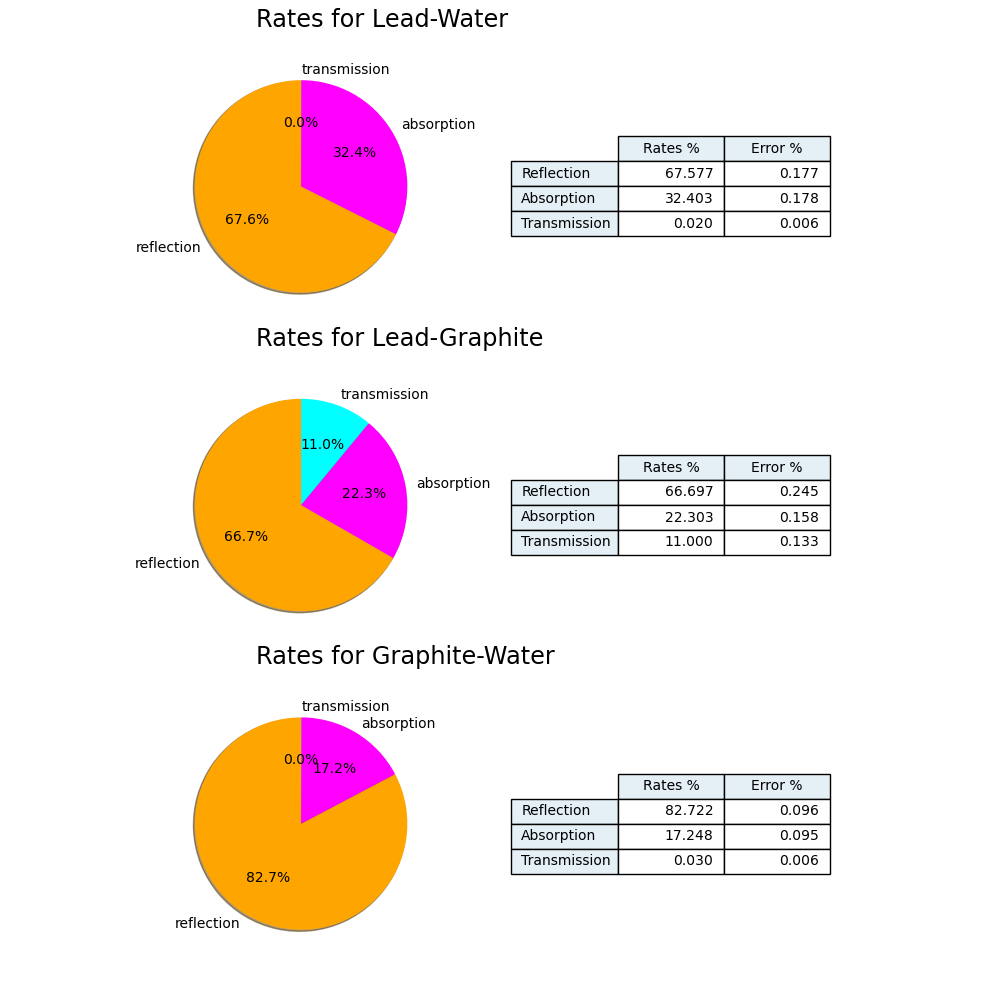

In [51]:
plt.close()
variables = [10,10,"lead","water"]
lead_water_results = averaging(10,variables)
variables = [10,10,"lead","graphite"]
lead_graphite_results = averaging(10,variables)
variables = [10,10,"graphite","water"]
graphite_water_results = averaging(10,variables)
pie_maker(lead_water_results,"Lead-Water",1)
pie_maker(lead_graphite_results,"Lead-Graphite",5)
pie_maker(graphite_water_results,"Graphite-Water",9)
plt.show()

Overall, the Woodcock method acts as a streamlined version of the Monte Carlo method, but there are some issues regarding the handling of neutrons at slab boundaries. This means that there is an error in the results produced by the Woodcock method when compared to the actual results. 

In order to further improve this project, the model needs to be reassessed because the current Monte Carlo simulation only works for monoenergetic thermal neutrons. In reality, the thermal neutrons will have a range of energies, so the model will need to take energy into account when determining the step size when the neutrons are scattered. This model would be similar to pre-existing models such as the MCNP model developed by the Los Alamos National Laboratory. In addition, we have assumed that scattering is isotropic when in reality it isn't. Scattering would be modelled as elastic collisions where the kinetic energy of the neutron changes for each collision. 